In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DTClassifier

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/fakenews.csv')

In [5]:
df

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0
...,...,...
4981,The storybook romance of WWE stars John Cena a...,0
4982,The actor told friends he’s responsible for en...,0
4983,Sarah Hyland is getting real. The Modern Fami...,0
4984,Production has been suspended on the sixth and...,0


In [5]:
df.head()

,text,label
0,Get the latest from TODAY Sign up for our news...,1
1,2d Conan On The Funeral Trump Will Be Invited...,1
2,It’s safe to say that Instagram Stories has fa...,0
3,Much like a certain Amazon goddess with a lass...,0
4,At a time when the perfect outfit is just one ...,0


In [6]:
df['label'].unique()

array([1, 0])

In [25]:
unique_text = df["text"].value_counts()[df["text"].value_counts()==1].index
duplicate_text = df["text"].value_counts()[df["text"].value_counts()>1].index
print(f"There are {len(unique_text)} non-repeating news text")
print(f"There are {len(duplicate_text)} duplicate news text")

There are 4567 non-repeating news text
There are 162 duplicate news text


In [7]:
df['text'].unique()

array(['Get the latest from TODAY Sign up for our newsletter  No one ever truly gets over losing a loved one, and Blake Shelton is no exception. He was just 14 when his older brother Richie died on Nov. 13, 1990. And, as Shelton noted in a tweet Monday, "It changed my life forever."  Richie was 24 when he died in a car accident in the Sheltons\' home state of Oklahoma. Two years ago, Shelton sent out a message for the 25th anniversary of his loss:  Richie, who was Blake\'s half-brother (they shared a mother), was a passenger in a car that collided with a school bus in Ada, south of Oklahoma City.  Richie, driver Redena McManus and a 3-year-old boy, Christopher McManus, all died during or shortly after the collision, while the bus driver and passengers were uninjured, according to police reports.  The accident has clearly remained with Blake, who told 60 Minutes in 2014, "I remember picking up the phone to call him a week after he was dead, to tell him something. I was picking up the ph

In [8]:
df['label'].value_counts()

label
0    2972
1    2014
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4986 non-null   object
 1   label   4986 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.0+ KB


In [11]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [12]:
df.describe()

,label
count,4986.000000
mean,0.403931
std,0.490733
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [27]:
duplicate_text[:162]

Index(['Scoopnest is a web media which finds for you the best tweets in real time! Get the top latest buzz on Twitter about everything you like : Breaking news, Sports, People, Fashion, Business, Entertainment, Health, Technology, Finance, etc...  We sort and classify the best buzzing tweets in categories that interest you the most.  With Scoopnest, no need to spend hours to find the tweets that give you a real scoop, you can save time by discovering straight away the most important things of Twitter!',
       'IMDb.com, Inc. takes no responsibility for the content or accuracy of the above news articles, Tweets, or blog posts. This content is published for the entertainment of our users only. The news articles, Tweets, and blog posts do not represent IMDb's opinions nor can we guarantee that the reporting therein is completely factual. Please visit the source responsible for the item in question to report any concerns you may have regarding content or accuracy.',
       'Fish in a Pit 

In [29]:
df['label'] = df['label'].replace("REAL", 1)
df['label'] = df['label'].replace("FAKE", 0)
df.head()

,text,label
0,get latest today sign newsletter no one ever t...,1
1,2d conan on the funeral trump will be invited ...,1
2,its safe say instagram stories far surpassed c...,0
3,much like certain amazon goddess lasso heights...,0
4,at time perfect outfit one click away high dem...,0


In [13]:
df.shape

(4986, 2)

<Axes: xlabel='label', ylabel='count'>

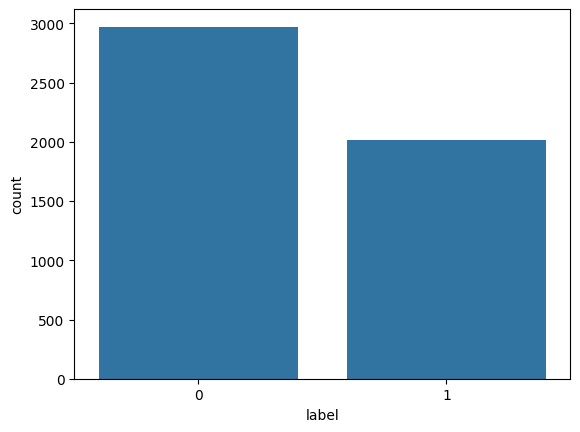

In [14]:
sns.countplot(data=df,
              x='label',
              order=df['label'].value_counts().index)

In [15]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [17]:
preprocessed_review = preprocess_text(df['text'].values)
df['text'] = preprocessed_review

100%|██████████| 4986/4986 [06:43<00:00, 12.34it/s]


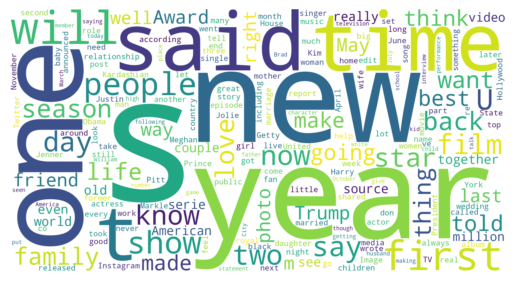

In [18]:
from wordcloud import WordCloud
text = " ".join(text for text in df["text"])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

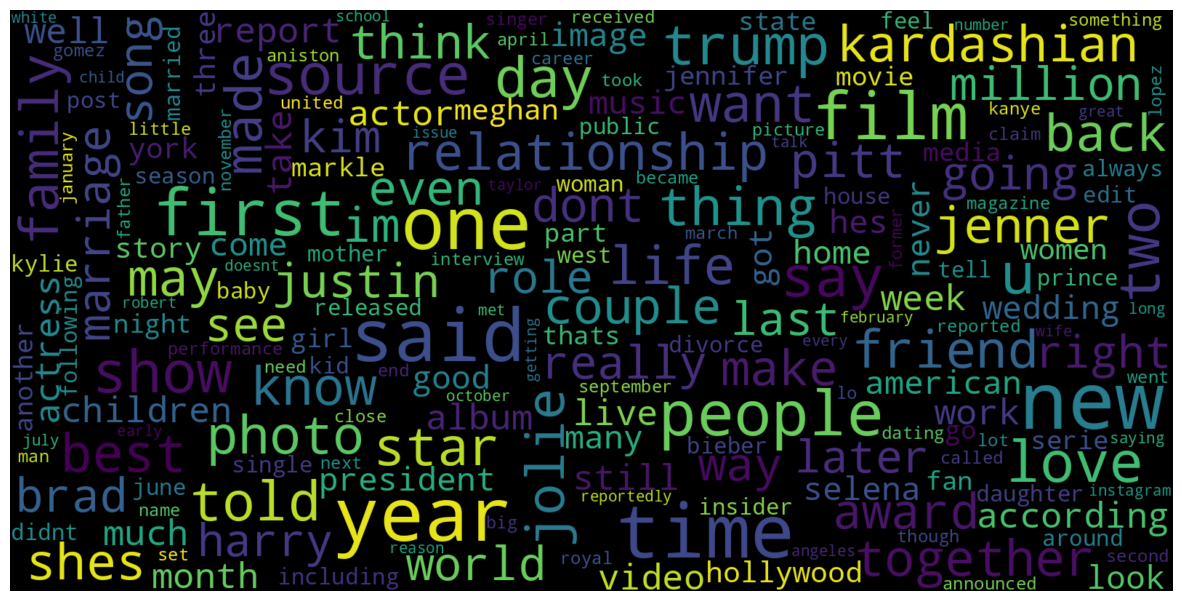

In [18]:
# Real
consolidated = ' '.join(
    word for word in df['text'][df['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

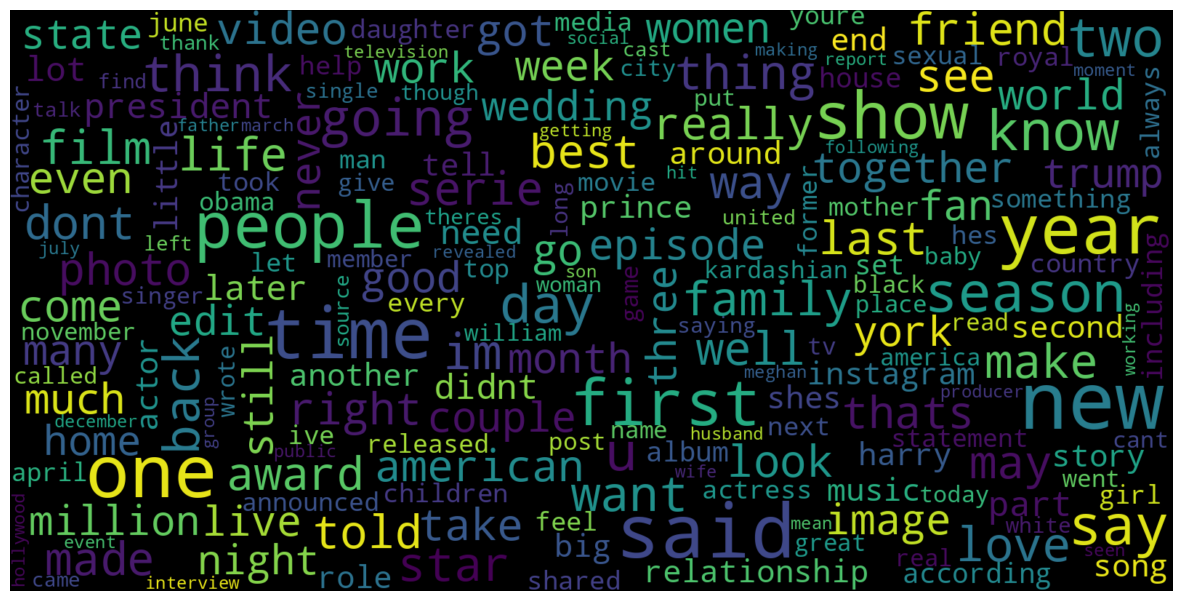

In [19]:
# Fake
consolidated = ' '.join(
    word for word in df['text'][df['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

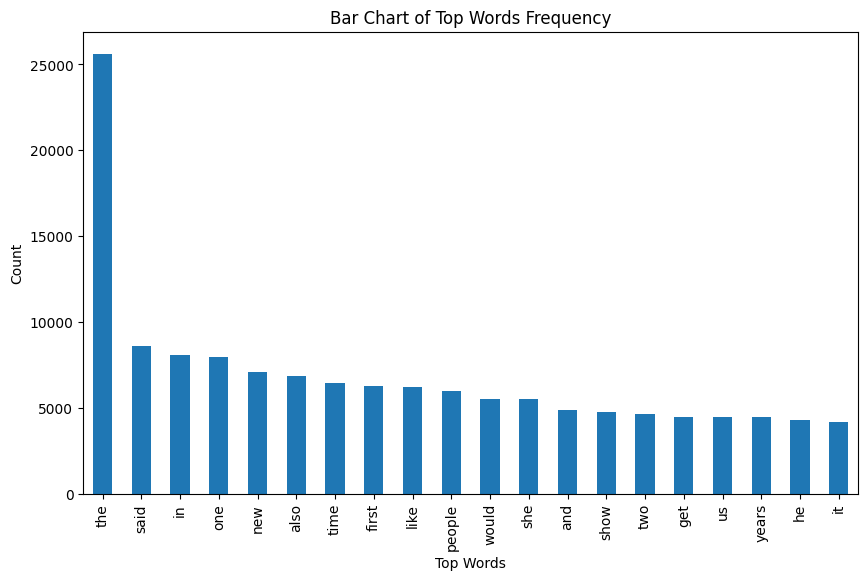

In [20]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

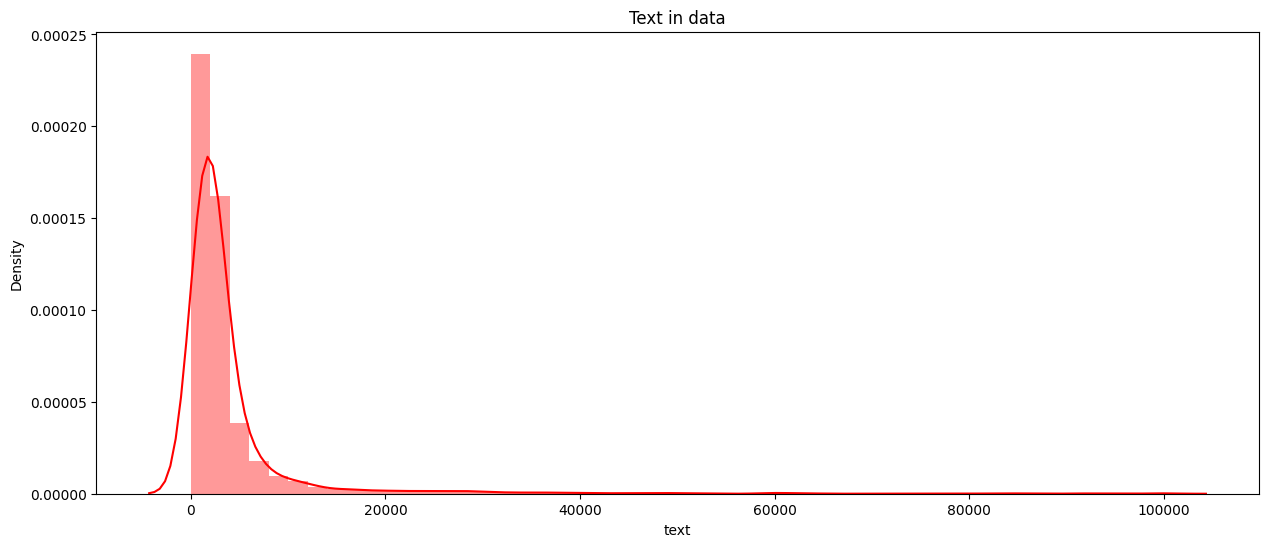

In [14]:
df_text=df['text'].str.len()
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(df_text,ax=ax,color='red')
ax.set_title('Text in data')
plt.show()

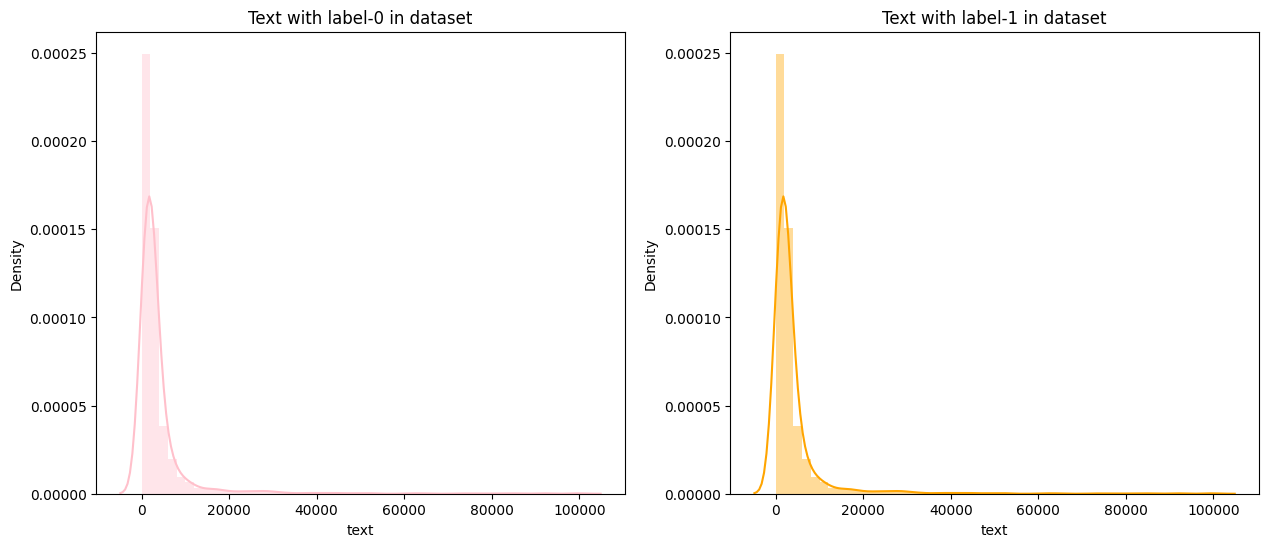

In [13]:
df_text_0=df['text'][df['label']==0].str.len()
df_text_1=df['text'][df['label']==0].str.len()
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.distplot(df_text_0,ax=ax[0],color='pink')
sns.distplot(df_text_1,ax=ax[1],color='orange')
ax[0].set_title('Text with label-0 in dataset')
ax[1].set_title('Text with label-1 in dataset')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df['text'],
                                                    df['label'],
                                                    test_size=0.75)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8908507223113965
0.746524064171123


In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9951845906902087
0.6647058823529411


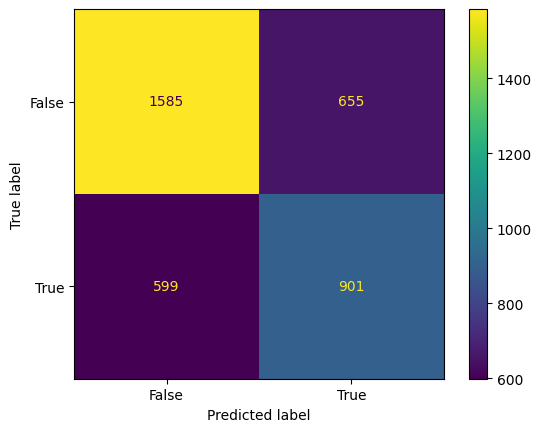

In [25]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [26]:
# Accuracy
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

# Precision
precision_train = precision_score(y_train, model.predict(x_train))
precision_test = precision_score(y_test, model.predict(x_test))

# Recall
recall_train = recall_score(y_train, model.predict(x_train))
recall_test = recall_score(y_test, model.predict(x_test))

# F1 Score
f1_train = 2 * precision_train * recall_train / (precision_train + recall_train)
f1_test = 2 * precision_test * recall_test / (precision_test + recall_test)

# Classification Report
print(classification_report(y_test, model.predict(x_test)))

# Print the evaluation metrics
print("Accuracy (Train):", accuracy_train)
print("Accuracy (Test):", accuracy_test)
print("Precision (Train):", precision_train)
print("Precision (Test):", precision_test)
print("Recall (Train):", recall_train)
print("Recall (Test):", recall_test)
print("F1 Score (Train):", f1_train)
print("F1 Score (Test):", f1_test)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      2240
           1       0.58      0.60      0.59      1500

    accuracy                           0.66      3740
   macro avg       0.65      0.65      0.65      3740
weighted avg       0.67      0.66      0.67      3740

Accuracy (Train): 0.9951845906902087
Accuracy (Test): 0.6647058823529411
Precision (Train): 1.0
Precision (Test): 0.5790488431876607
Recall (Train): 0.9883268482490273
Recall (Test): 0.6006666666666667
F1 Score (Train): 0.9941291585127202
F1 Score (Test): 0.5896596858638743


**Observation**

1.The model has a slightly higher accuracy on the training set (0.5369) compared to the test set (0.5016), indicating a small amount of overfitting.

2.The precision and recall scores are relatively low for both train and test sets, suggesting that the model is not very good at correctly identifying positive cases.

3.The F1 score, which balances precision and recall, is also relatively low, indicating that the model's performance is not very good overall.

4.Further investigation and model tuning might be needed to improve the model's performance.


**Conclusion**

Decision Tree Classifier and Logistic regression are performing well.